<a href="https://colab.research.google.com/github/fahmisyuhada/Big-Data-Digitalent/blob/main/1_Section_%EF%BC%9A_Python_Structured_Data_Processing_Quick_Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson2：Loading data from different data types

In [1]:
import pandas as pd
%matplotlib inline


In [2]:
mydata = pd.read_csv("tc_data1.csv", sep=';')


In [3]:
mydata[:5]

,id,locale,code,gmt,order_fee,user_cash
0,197618580,BD,blogs,2016/6/6 23:38,0,0.00
1,219441220,US,blogs,2016/6/6 22:14,1.001,234.11
2,159310260,IN,blogs,2016/6/6 21:42,0,0.00
3,939386456,BG,blogs,2016/6/6 21:21,10,2134.11
4,235570459,GB,blogs,2016/6/6 21:20,0,0.00


In [ ]:

# if data type is json
# data2 = pd.read_json("data/Cell_Phones.json", lines = True)
# data2.summary[:5]

# lesson3：Problems of the raw data

There an problem with data when the value is NaN mean Not an Number and some dta is empty. so we must fix it. for example, in the data there is not number data in user cash column.  

In [4]:
mydata[:10]

,id,locale,code,gmt,order_fee,user_cash
0,197618580,BD,blogs,2016/6/6 23:38,0,0.00
1,219441220,US,blogs,2016/6/6 22:14,1.001,234.11
2,159310260,IN,blogs,2016/6/6 21:42,0,0.00
3,939386456,BG,blogs,2016/6/6 21:21,10,2134.11
4,235570459,GB,blogs,2016/6/6 21:20,0,0.00
5,235570459,GB,blogs,2016/6/6 21:20,0,0.00
6,-,GB,blogs,2016/6/6 21:19,0,0.00
7,559969234,IN,blogs,2016/6/6 20:59,testing,0.00
8,184695152,US,blogs,2016/6/6 19:33,NaN,0.00
9,240415115,SG,blogs,2016/6/6 19:32,0,0.00


In [5]:
mydata.order_fee

0           0
1       1.001
2           0
3          10
4           0
        ...  
1194        0
1195        0
1196        0
1197        0
1198        0
Name: order_fee, Length: 1199, dtype: object

In [6]:
type(mydata.order_fee)

pandas.core.series.Series

In [7]:
mydata.order_fee[:10]

0          0
1      1.001
2          0
3         10
4          0
5          0
6          0
7    testing
8        NaN
9          0
Name: order_fee, dtype: object

In [8]:
len(mydata)

1199

In [9]:
mydata.describe()

,user_cash
count,1199.000000
mean,1208.547836
std,10043.640552
min,0.000000
25%,0.000000
50%,0.000000
75%,12.542373
max,242607.704400


In [10]:
mydata.isnull()

,id,locale,code,gmt,order_fee,user_cash
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1194,False,False,False,False,False,False
1195,False,False,False,False,False,False
1196,False,False,False,False,False,False
1197,False,False,False,False,False,False


In [12]:
mydata.gmt.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1194    False
1195    False
1196    False
1197    False
1198    False
Name: gmt, Length: 1199, dtype: bool

0       False
1       False
2       False
3       False
4       False
        ...  
1194    False
1195    False
1196    False
1197    False
1198    False
Name: gmt, Length: 1199, dtype: bool

In [15]:
mydata[mydata.gmt.isnull()]

,id,locale,code,gmt,order_fee,user_cash
21,220828752,US,blogs,NaN,0,0.00000
32,94381694,HK,blogs,NaN,0,0.00000
167,985891075,US,blogs,NaN,0,0.00000
742,102205435,AU,blogs,NaN,13.746849,24348.30296


In [13]:
mydata.dtypes

id            object
locale        object
code          object
gmt           object
order_fee     object
user_cash    float64
dtype: object

In [14]:
print(mydata.gmt[0])
print(type(mydata.gmt[0]))

2016/6/6 23:38
<class 'str'>


# Lesson4：Data scrubbing

In [16]:
mydata[mydata.order_fee.isnull()]

,id,locale,code,gmt,order_fee,user_cash
8,184695152,US,blogs,2016/6/6 19:33,NaN,0.0
28,215762736,US,blogs,2016/6/6 12:20,NaN,0.0
121,955211948,MY,blogs,2016/6/4 14:42,NaN,0.0
128,86603792,US,blogs,2016/6/4 13:20,NaN,1.0


In [17]:
mydata[:10]

,id,locale,code,gmt,order_fee,user_cash
0,197618580,BD,blogs,2016/6/6 23:38,0,0.00
1,219441220,US,blogs,2016/6/6 22:14,1.001,234.11
2,159310260,IN,blogs,2016/6/6 21:42,0,0.00
3,939386456,BG,blogs,2016/6/6 21:21,10,2134.11
4,235570459,GB,blogs,2016/6/6 21:20,0,0.00
5,235570459,GB,blogs,2016/6/6 21:20,0,0.00
6,-,GB,blogs,2016/6/6 21:19,0,0.00
7,559969234,IN,blogs,2016/6/6 20:59,testing,0.00
8,184695152,US,blogs,2016/6/6 19:33,NaN,0.00
9,240415115,SG,blogs,2016/6/6 19:32,0,0.00


if we have data value in columt that is string, this expression will error. in 7th line, there "testing" value, so if we convert column data value types so, the statement will display an error

In [18]:
mydata.order_fee = pd.to_numeric(mydata.order_fee)

ValueError: ignored

so we must add the some parameter tha will set NaN for unnumerical value to convert.

In [19]:
# data types before convert filed data types value
mydata.dtypes

id            object
locale        object
code          object
gmt           object
order_fee     object
user_cash    float64
dtype: object

In [20]:
mydata.order_fee = pd.to_numeric(mydata.order_fee, errors="coerce")

In [21]:
 # data types after convert filed data types value
mydata.dtypes

id            object
locale        object
code          object
gmt           object
order_fee    float64
user_cash    float64
dtype: object

In [22]:
mydata[:10]

,id,locale,code,gmt,order_fee,user_cash
0,197618580,BD,blogs,2016/6/6 23:38,0.000,0.00
1,219441220,US,blogs,2016/6/6 22:14,1.001,234.11
2,159310260,IN,blogs,2016/6/6 21:42,0.000,0.00
3,939386456,BG,blogs,2016/6/6 21:21,10.000,2134.11
4,235570459,GB,blogs,2016/6/6 21:20,0.000,0.00
5,235570459,GB,blogs,2016/6/6 21:20,0.000,0.00
6,-,GB,blogs,2016/6/6 21:19,0.000,0.00
7,559969234,IN,blogs,2016/6/6 20:59,NaN,0.00
8,184695152,US,blogs,2016/6/6 19:33,NaN,0.00
9,240415115,SG,blogs,2016/6/6 19:32,0.000,0.00


In [23]:
# so next we want to eliminate NaN data
mydata.dropna()

,id,locale,code,gmt,order_fee,user_cash
0,197618580,BD,blogs,2016/6/6 23:38,0.000,0.00
1,219441220,US,blogs,2016/6/6 22:14,1.001,234.11
2,159310260,IN,blogs,2016/6/6 21:42,0.000,0.00
3,939386456,BG,blogs,2016/6/6 21:21,10.000,2134.11
4,235570459,GB,blogs,2016/6/6 21:20,0.000,0.00
...,...,...,...,...,...,...
1194,873561588,SG,blogs,2016/1/30 21:49,0.000,0.00
1195,442482286,US,blogs,2016/1/30 19:21,0.000,0.00
1196,288152053,SG,blogs,2016/1/30 19:20,0.000,0.00
1197,288152053,SG,blogs,2016/1/30 19:14,0.000,0.00


In [24]:
mydata[:10]

,id,locale,code,gmt,order_fee,user_cash
0,197618580,BD,blogs,2016/6/6 23:38,0.000,0.00
1,219441220,US,blogs,2016/6/6 22:14,1.001,234.11
2,159310260,IN,blogs,2016/6/6 21:42,0.000,0.00
3,939386456,BG,blogs,2016/6/6 21:21,10.000,2134.11
4,235570459,GB,blogs,2016/6/6 21:20,0.000,0.00
5,235570459,GB,blogs,2016/6/6 21:20,0.000,0.00
6,-,GB,blogs,2016/6/6 21:19,0.000,0.00
7,559969234,IN,blogs,2016/6/6 20:59,NaN,0.00
8,184695152,US,blogs,2016/6/6 19:33,NaN,0.00
9,240415115,SG,blogs,2016/6/6 19:32,0.000,0.00


In [25]:
# so next we want to eliminate NaN data
mydata.dropna(inplace = True)

In [26]:
mydata[:10]

,id,locale,code,gmt,order_fee,user_cash
0,197618580,BD,blogs,2016/6/6 23:38,0.000,0.00
1,219441220,US,blogs,2016/6/6 22:14,1.001,234.11
2,159310260,IN,blogs,2016/6/6 21:42,0.000,0.00
3,939386456,BG,blogs,2016/6/6 21:21,10.000,2134.11
4,235570459,GB,blogs,2016/6/6 21:20,0.000,0.00
5,235570459,GB,blogs,2016/6/6 21:20,0.000,0.00
6,-,GB,blogs,2016/6/6 21:19,0.000,0.00
9,240415115,SG,blogs,2016/6/6 19:32,0.000,0.00
10,926469952,US,blogs,2016/6/6 18:52,0.000,0.00
11,926469952,US,blogs,2016/6/6 18:52,0.000,0.00


In [27]:
mydata[mydata.order_fee.isnull()]

,id,locale,code,gmt,order_fee,user_cash


In [28]:
len(mydata)

1182

we have scrubbing the NaN value in our data, so next we want to fix another problem.

 but fires we we want to convert GMT data type to datetaime data types

In [29]:
mydata.gmt = pd.to_datetime(mydata.gmt)

In [30]:
mydata.dtypes

id                   object
locale               object
code                 object
gmt          datetime64[ns]
order_fee           float64
user_cash           float64
dtype: object

In [33]:
mydata.describe(include="all")

<ipython-input-33-e66d2eb6da99>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mydata.describe(include="all")


,id,locale,code,gmt,order_fee,user_cash
count,1182,1182,1182,1182,1182.000000,1182.000000
unique,629,58,2,1134,NaN,NaN
top,442482286,US,blogs,2016-01-30 21:49:00,NaN,NaN
freq,15,339,1078,4,NaN,NaN
first,NaN,NaN,NaN,2016-01-30 19:01:00,NaN,NaN
last,NaN,NaN,NaN,2016-06-06 23:38:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,64.319130,1205.216403
std,NaN,NaN,NaN,NaN,306.476664,10092.266398
min,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000


In [34]:
mydata.gmt < "2016-02-01"

0       False
1       False
2       False
3       False
4       False
        ...  
1194     True
1195     True
1196     True
1197     True
1198     True
Name: gmt, Length: 1182, dtype: bool

In [35]:
mydata[mydata.gmt < "2016-02-01"]

,id,locale,code,gmt,order_fee,user_cash
1178,442482286,US,blogs,2016-01-31 15:48:00,0.0,30.0
1179,442482286,US,blogs,2016-01-31 15:43:00,0.0,30.0
1180,442482286,US,blogs,2016-01-31 15:21:00,10.0,30.0
1181,442482286,US,blogs,2016-01-31 11:59:00,0.0,30.0
1182,554908853,US,blogs,2016-01-31 11:52:00,0.0,30.0
1183,554908853,US,blogs,2016-01-31 11:27:00,0.0,30.0
1184,442482286,US,blogs,2016-01-30 23:05:00,0.0,30.0
1185,442482286,US,blogs,2016-01-30 23:01:00,0.0,30.0
1186,442482286,US,blogs,2016-01-30 22:11:00,0.0,30.0
1187,442482286,US,blogs,2016-01-30 22:09:00,10.0,30.0


we want to continue to scrubbing the data where in id we have the dash value. in line 6

In [36]:
mydata[:10]

,id,locale,code,gmt,order_fee,user_cash
0,197618580,BD,blogs,2016-06-06 23:38:00,0.000,0.00
1,219441220,US,blogs,2016-06-06 22:14:00,1.001,234.11
2,159310260,IN,blogs,2016-06-06 21:42:00,0.000,0.00
3,939386456,BG,blogs,2016-06-06 21:21:00,10.000,2134.11
4,235570459,GB,blogs,2016-06-06 21:20:00,0.000,0.00
5,235570459,GB,blogs,2016-06-06 21:20:00,0.000,0.00
6,-,GB,blogs,2016-06-06 21:19:00,0.000,0.00
9,240415115,SG,blogs,2016-06-06 19:32:00,0.000,0.00
10,926469952,US,blogs,2016-06-06 18:52:00,0.000,0.00
11,926469952,US,blogs,2016-06-06 18:52:00,0.000,0.00


In [37]:
mydata[mydata.id == "-"]

,id,locale,code,gmt,order_fee,user_cash
6,-,GB,blogs,2016-06-06 21:19:00,0.0,0.0
106,-,MY,blogs,2016-06-04 19:20:00,0.0,0.0
140,-,US,blogs,2016-06-04 10:49:00,0.0,0.0


In [38]:
mydata = mydata[mydata.id != "-"]

In [39]:
mydata[:10]

,id,locale,code,gmt,order_fee,user_cash
0,197618580,BD,blogs,2016-06-06 23:38:00,0.000,0.00
1,219441220,US,blogs,2016-06-06 22:14:00,1.001,234.11
2,159310260,IN,blogs,2016-06-06 21:42:00,0.000,0.00
3,939386456,BG,blogs,2016-06-06 21:21:00,10.000,2134.11
4,235570459,GB,blogs,2016-06-06 21:20:00,0.000,0.00
5,235570459,GB,blogs,2016-06-06 21:20:00,0.000,0.00
9,240415115,SG,blogs,2016-06-06 19:32:00,0.000,0.00
10,926469952,US,blogs,2016-06-06 18:52:00,0.000,0.00
11,926469952,US,blogs,2016-06-06 18:52:00,0.000,0.00
12,926469952,US,blogs,2016-06-06 18:52:00,0.000,0.00


# lesson5：Data analysis and virtualization

In [40]:
mydata.locale.value_counts()

US    338
IN    131
MY    122
AU     85
SG     80
ID     74
GB     37
AE     35
TW     27
ES     20
DE     18
NG     15
CA     14
FR     13
PH     11
SA     10
BG     10
TH     10
HK      9
IT      9
NL      9
HU      8
LK      7
KR      6
EC      5
RU      5
DO      5
PE      5
ZA      4
PK      4
MA      4
NZ      3
BR      3
MX      3
BY      3
DK      3
MO      3
CI      3
VN      3
TR      2
BE      2
KZ      2
RS      2
NO      2
BD      2
UA      1
KE      1
BA      1
BO      1
EG      1
UG      1
SE      1
IE      1
KH      1
AZ      1
JO      1
IL      1
MN      1
Name: locale, dtype: int64

<Axes: >

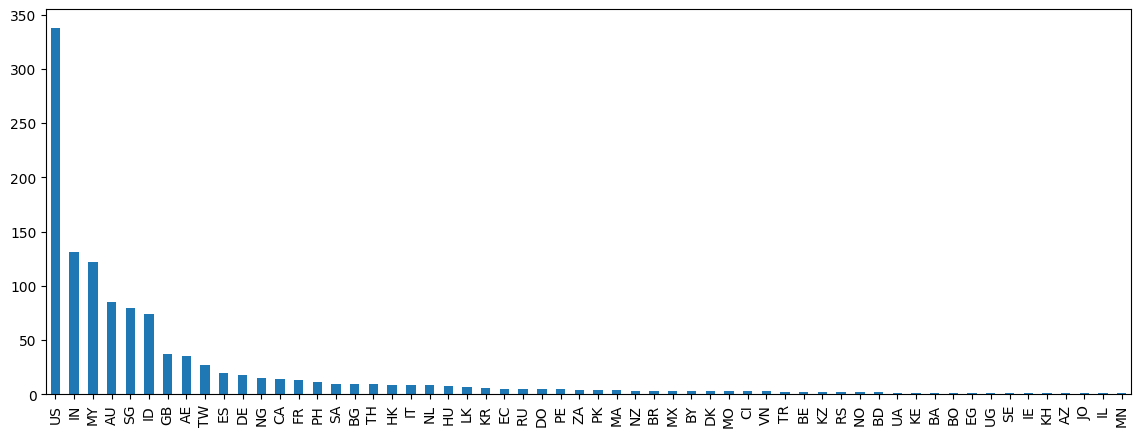

In [42]:
mydata.locale.value_counts().plot(kind='bar',figsize = (14,5))

In [44]:
weekdays = mydata.gmt.dt.weekday
weekdays

0       0
1       0
2       0
3       0
4       0
       ..
1194    5
1195    5
1196    5
1197    5
1198    5
Name: gmt, Length: 1179, dtype: int64

In [45]:
mydata = mydata.assign(weekdays = weekdays)
mydata[:10]

,id,locale,code,gmt,order_fee,user_cash,weekdays
0,197618580,BD,blogs,2016-06-06 23:38:00,0.000,0.00,0
1,219441220,US,blogs,2016-06-06 22:14:00,1.001,234.11,0
2,159310260,IN,blogs,2016-06-06 21:42:00,0.000,0.00,0
3,939386456,BG,blogs,2016-06-06 21:21:00,10.000,2134.11,0
4,235570459,GB,blogs,2016-06-06 21:20:00,0.000,0.00,0
5,235570459,GB,blogs,2016-06-06 21:20:00,0.000,0.00,0
9,240415115,SG,blogs,2016-06-06 19:32:00,0.000,0.00,0
10,926469952,US,blogs,2016-06-06 18:52:00,0.000,0.00,0
11,926469952,US,blogs,2016-06-06 18:52:00,0.000,0.00,0
12,926469952,US,blogs,2016-06-06 18:52:00,0.000,0.00,0


In [46]:
weekdays_counts = mydata.groupby("weekdays").count()
weekdays_counts

,id,locale,code,gmt,order_fee,user_cash
weekdays,,,,,,
0,221,221,221,221,221,221
1,170,170,170,170,170,170
2,136,136,136,136,136,136
3,100,100,100,100,100,100
4,134,134,134,134,134,134
5,187,187,187,187,187,187
6,231,231,231,231,231,231


<Axes: xlabel='weekdays'>

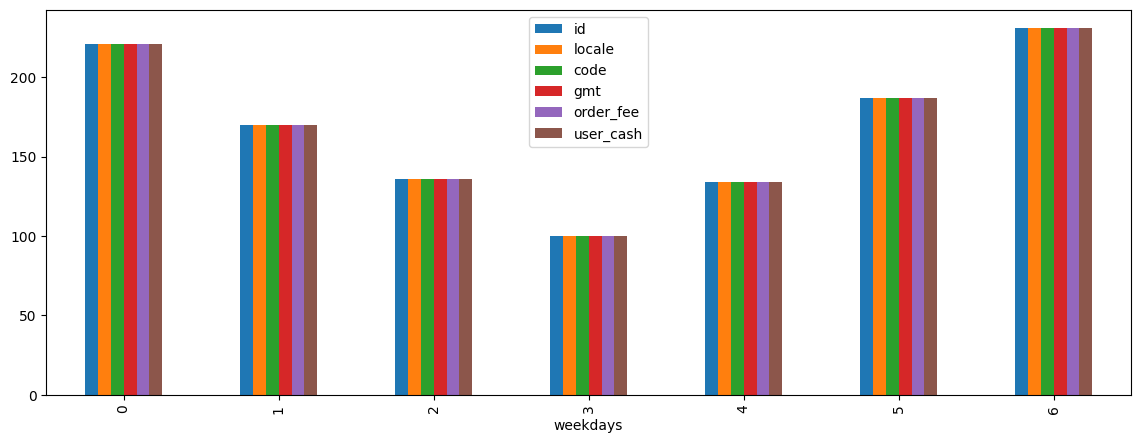

In [48]:
weekdays_counts.plot(kind="bar", figsize=(14,5))

<Axes: xlabel='weekdays'>

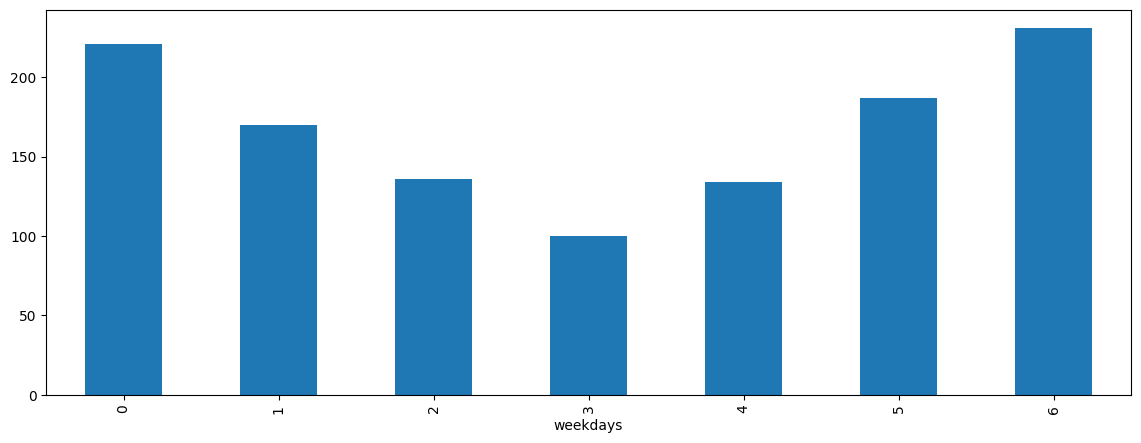

In [49]:
weekdays_counts.id.plot(kind="bar", figsize=(14,5))

# lesson6：Deal with more than one data set

In [53]:
meta = pd.read_csv("meta_country_region.csv", sep=",", encoding='utf-8')

In [54]:
meta[:5]

,Country_Long,Country_Short,Region,Country_Long.1
0,Algeria,DZ,Africa,Algeria
1,Argentina,AR,America,Argentina
2,Australia,AU,ANZ,Australia
3,Austria,AT,EU,Austria
4,Azerbaijan,AZ,Asia,Azerbaijan


In [55]:
pd.merge(mydata, meta,how="left",left_on="locale", right_on="Country_Short")

,id,locale,code,gmt,order_fee,user_cash,weekdays,Country_Long,Country_Short,Region,Country_Long.1
0,197618580,BD,blogs,2016-06-06 23:38:00,0.000,0.00,0,Bangladesh,BD,Asia,Bangladesh
1,219441220,US,blogs,2016-06-06 22:14:00,1.001,234.11,0,US,US,US,US
2,159310260,IN,blogs,2016-06-06 21:42:00,0.000,0.00,0,India,IN,IN,India
3,939386456,BG,blogs,2016-06-06 21:21:00,10.000,2134.11,0,Bulgaria,BG,EU,Bulgaria
4,235570459,GB,blogs,2016-06-06 21:20:00,0.000,0.00,0,UK,GB,EU,UK
...,...,...,...,...,...,...,...,...,...,...,...
1174,873561588,SG,blogs,2016-01-30 21:49:00,0.000,0.00,5,Singapore,SG,SG,Singapore
1175,442482286,US,blogs,2016-01-30 19:21:00,0.000,0.00,5,US,US,US,US
1176,288152053,SG,blogs,2016-01-30 19:20:00,0.000,0.00,5,Singapore,SG,SG,Singapore
1177,288152053,SG,blogs,2016-01-30 19:14:00,0.000,0.00,5,Singapore,SG,SG,Singapore


In [56]:
joindf = pd.merge(mydata, meta,how="left",left_on="locale", right_on="Country_Short")

In [57]:
len(joindf)

1179

In [58]:
len(mydata)

1179

In [60]:
countdf = joindf.groupby("Region").count()


<Axes: xlabel='Region'>

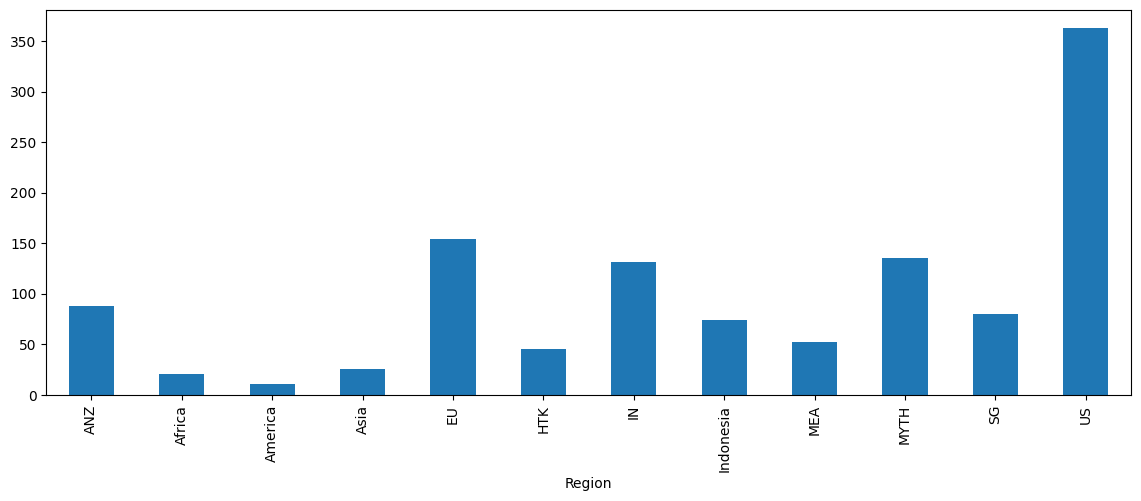

In [61]:
countdf.id.plot(kind="bar", figsize=(14,5))